<h1>DSP: Notebook-1: <i>Basic signal generation and simple plotting.</i></h1>
<p>This is part of series of posts on working with <em>DSP.py: The Digitial Signal Processing Module</em>.</p>
<p>For the complete notebooks series, follow the link above.</p>

<h2>Objectives</h2>
<p>In this notebook, we show how create simple sinusiodal functions graph them using the <em>DSP</em> module.</p> 
<p>But more importantly, we draw a comparison on the code required using <em>Numpy</em> and <em>Matplotlib.pyplot</em> to provided equal results. </p>

<h2>Background: <font color="purple">DSP</font></h2>
<p>The <em>DSP</em> module is, in its truest form, is a wrapper for three standardized packages: 
<ul>
    <li>NumPy: Base N-dimensional array package.</li>
    <li>SciPy: Fundamental library for scientific computing.</li>
    <li>Matplotlib.pyplot: The state-based interface to <i>matplotlib</i> for comprehensive plotting.</li>
</ul> 
</p>
<p>So although in this post, we will take the time to show that using NumPy and Matplotlib can be verbose and are prone to many user errors, it should not be confused that we are impling these packages are lacking; they are the unbelly of the <em>DSP</em> module. We are simply provding an easier user-interface. Intuitive set of APIs to more easily harness thier power for rapid dvelopement, experiementing, and learning. </p>

<h2>Workspace</h2>
<p>In this notebook we will be: 
<ol>
<li>Creating two sinusiodal signals - one without noise and one with noise - with the <em>DSP</em> module and the <em>Numpy</em>. Of course, we will ensure that these signals are indentical; same signal characteristics and additive noise.
</li> 
<li>Along with signal creation, we will also be showing and comparing the two methods for plotting signal; using <em>matplotlib.pyplot</em> and <em>DSP</em>.
</li>
</ol>      
</p>


<h3>Imports:</h3>
<p>One of the main goals for <em>DSP</em> is to be a standalone package; providing everything you may need to successfully study digital siganl processing. However, for this post we shall import other neccesary packages in order to draw comparison between such packages.</p>
<p>As a result, we will be importing three modules; the <em>DSP</em>, <em>Numpy</em> and <em>Matplotlin.pyplot</em>.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DSP as dsp
dsp.hello_world() # test function to test import. 

Hello world from DSP module.


<h3>Signal Creation - <font color="purple">Setting up givens</font></h3>
<p>This is same for both DSP and numpy signal generation methods.</p>

In [2]:
a = 2.4
dc = 0.2
n = 1024
p = 0.001
fo = 1000
fs = fo*35.97 # Random factor to ease plotting with 'linear hold' interpolation.
ph = 3.0/4.0
debug = False

<h3>Signal Creation - <font color = "purple">Generating noise signal<font></h3>


In [3]:
# Create noise signal:
# --------------------
# 
# 	DSP supports noise object generation that can be used during signal
#   creation. 
#
#   For numpy you will need to to create a np.ndarray that is to be 
#   added to the signal. 
#
noise = dsp.Noise(form = "awg", mean = 0, std = .5 , size = n)
_noise = np.random.normal(0, 0.5, n)

<h3>Signal Creation - <font color="purple">Numpy signal creation</font></h3>

In [4]:
# Numpy Signal creation:
# ---------------------- 
#
# 	Two lines per signal:
#   	1. Time-index array (the sampling time-array) 
#       2. The actual signal (e.g. sin, cos, etc.)
# 	
#   Note: If all signals share the same time-index array then you can 
#         save lines.
#
nTs = np.linspace(start=0, stop=(float(1)/fs)*n, num=n)
X   = (a)*np.sin(((fo)*2*np.pi)*nTs + ph) + dc
Xn  = _noise + X
Y   = (a)*np.cos(((fo)*2*np.pi)*nTs + ph) + dc
Yn = _noise + Y

<h3>Signal-Creation: <font color="purple">DSP signal creation</font></h3>

In [5]:
# DSP Signal creation:
# --------------------
#
# 	One line per generation
# 
#   Note: remeber to set 'debug' to false to surpress debug printing.
# 
x  = dsp.sin(a=a,dc=dc,n=n,per=p,fs=fs,phase=ph, debug=debug) 
xn = dsp.sin(a=a,dc=dc,n=n,per=p,fs=fs,phase=ph,noise=noise, debug=debug) 
y  = dsp.cos(a=a,dc=dc,n=n,per=p,fs=fs,phase=ph) 
yn = dsp.cos(a=a,dc=dc,n=n,per=p,fs=fs,phase=ph,noise=noise) 

<h3>Single plots: <font color="purple">Using matplotlib.pyplot</font></h3>

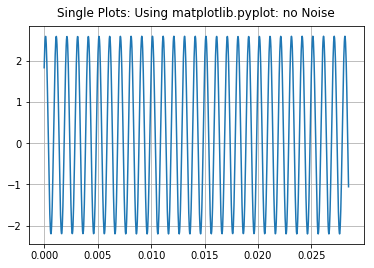

In [6]:
plt.figure()
plt.plot(nTs, X)
plt.title("Single Plots: Using matplotlib.pyplot: no Noise")
plt.grid()
plt.show()

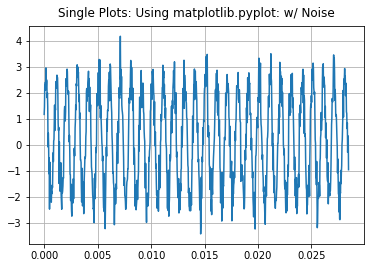

In [7]:
plt.figure()
plt.plot(nTs, Xn)
plt.title("Single Plots: Using matplotlib.pyplot: w/ Noise")
plt.grid()

<h3>Single plots: <font color="purple">Using DSP</font></h3>

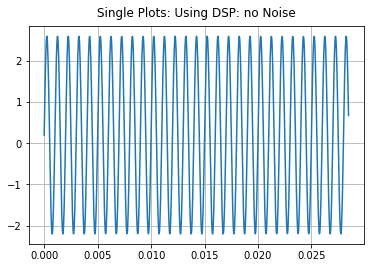

In [8]:
x.tplot(title="Single Plots: Using DSP: no Noise")

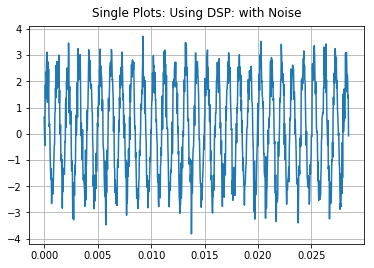

In [9]:
xn.tplot(title="Single Plots: Using DSP: with Noise")
# Note: the Xn and xn are using different noise arrays.

<h3>Subplots: <font color="purple">Using matplotlib.pyplot<font></h3>

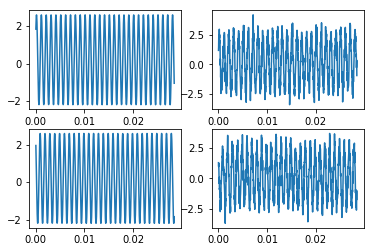

In [10]:
plt.figure(num="without DSP")

plt.subplot(2, 2, 1)
plt.plot(nTs, X)

plt.subplot(2, 2, 2)
plt.plot(nTs, Xn)

plt.subplot(2, 2, 3)
plt.plot(nTs, Y)

plt.subplot(2, 2, 4)
plt.plot(nTs, Yn)

<h3>Subplots: <font color="purple">Using DSP</font></h3>

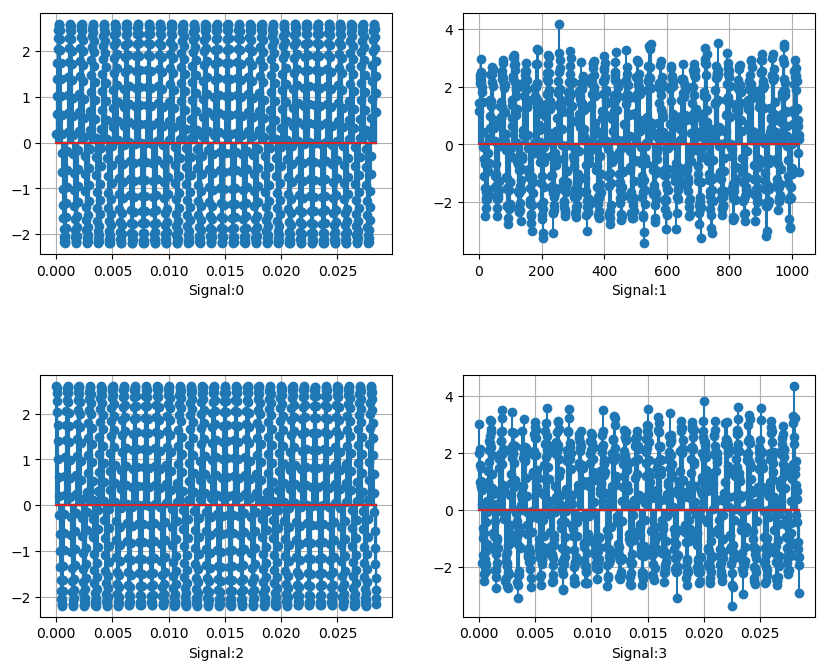

In [12]:
dsp.subplot([x,xn,y,yn], dim=(2,2)) 
# the 'dsp.subplot' function can handle either 'dsp.signal' object or 
# numpy.ndarray objects.